In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
data = pd.read_csv("C:\\Users\\Isaiah Erb\\Documents\\Work Portfolio\\S&P 500 Predictions\\SPY.csv")

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.index = data['Date']

del data['Date']
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Volume']

<Axes: xlabel='Date', ylabel='Close'>

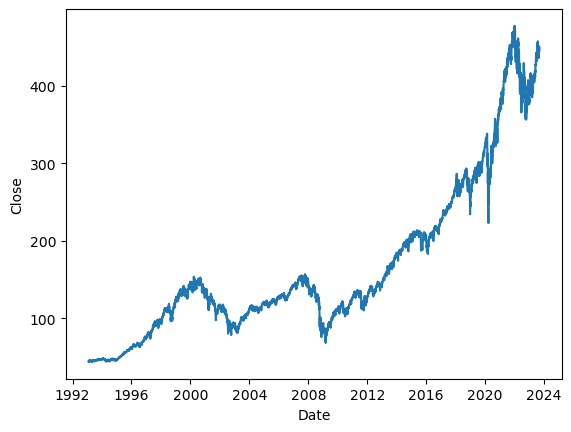

In [20]:
sns.lineplot(data['Close'])

In [26]:
#Check for stationarity
rolling_mean = data.rolling(12).mean()
rolling_std = data.rolling(12).std()

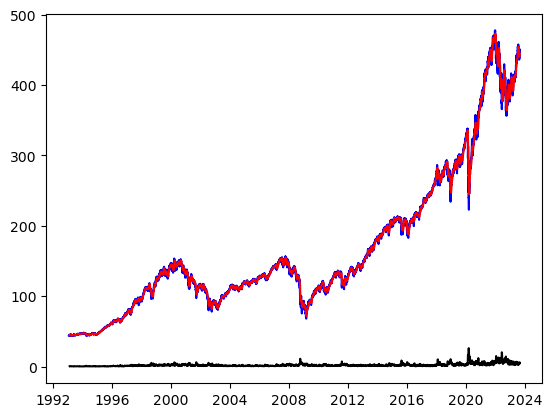

In [28]:
plt.plot(data, color="blue",label="Original S&P 500 Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Closing Price")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Closing Price")

In [29]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adft = adfuller(data,autolag="AIC")

In [32]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0     1.212200              Test Statistics
1     0.996069                      p-value
2    36.000000             No. of lags used
3  7669.000000  Number of observations used
4    -3.431203          critical value (1%)
5    -2.861917          critical value (5%)
6    -2.566971         critical value (10%)


According to the p-value being greater than 5%, we can determine that there is no stationarity in this dataset.

In [34]:
#Check for autocorrelation
autocorrelation_lag1 = data['Close'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = data['Close'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = data['Close'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = data['Close'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9997639834849401
Three Month Lag:  0.9993584880597648
Six Month Lag:  0.9987847439205609
Nine Month Lag:  0.9982638707989869


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

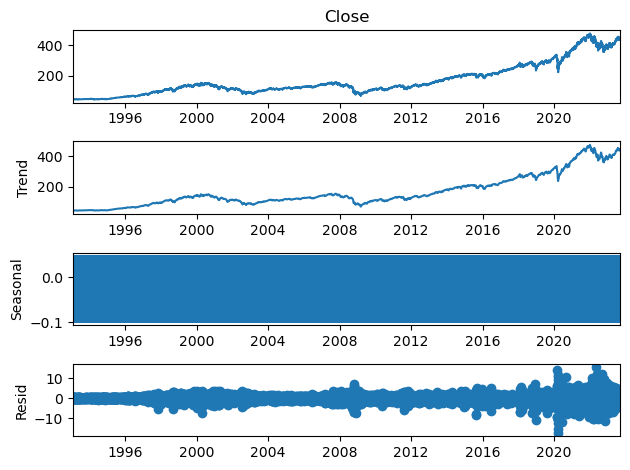

In [36]:
decompose = seasonal_decompose(data['Close'],model='additive', period=7)
decompose.plot()
plt.show()

C:\Users\Isaiah Erb\AppData\Local\Temp\ipykernel_1504\100662375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Close']
C:\Users\Isaiah Erb\AppData\Local\Temp\ipykernel_1504\100662375.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Close']


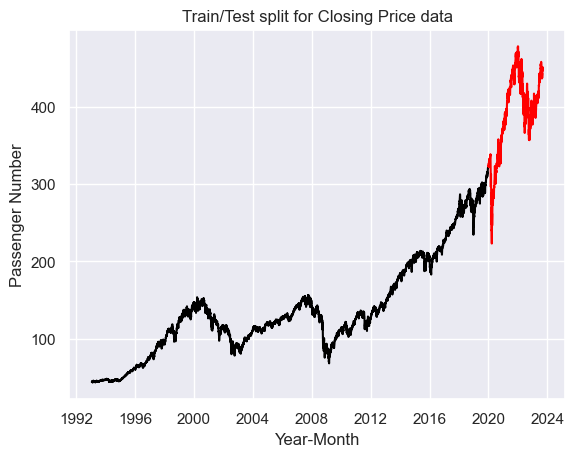

In [40]:
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2020-01")]
train['train'] = train['Close']
del train['Date']
del train['Close']
test = data[data['Date'] >= pd.to_datetime("2020-01")]
del test['Date']
test['test'] = test['Close']
del test['Close']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Closing Price data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [43]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24678.238, Time=9.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24705.650, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24693.556, Time=1.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24692.084, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24708.738, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24677.525, Time=10.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24678.978, Time=2.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24675.541, Time=6.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24677.526, Time=17.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24679.743, Time=2.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=24680.876, Time=2.61 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 55.542 seconds


C:\Users\Isaiah Erb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
forecast

,Prediction
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2023-08-30,NaN
2023-08-31,NaN
2023-09-01,NaN


In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

ValueError: Input contains NaN.